# Estratégia para seleção de ações do setor de energia elétrica a partir do método multicritério AHP - Gaussiano

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import dataframe_image as dfi

## Carregando a base de dados

In [2]:
dados = pd.read_csv('dados/statusinvest-busca-avancada.csv', sep = ';')

In [3]:
dados.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,...,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AESB3,"9,66","1,11","10,06","1,45","0,33","23,57","15,63","18,74","12,06",...,"0,23","0,68","0,18",NaN,NaN,"16.336.194,07","6,65","0,96",NaN,"4.753.748.741,70"
1,AFLT3,"9,05","4,71","4,89","2,18","1,87","84,18","81,89","79,24","4,74",...,"0,86","0,14","0,48","30,86","52,19","11.692,57","4,15","1,85","0,01","570.916.535,00"
2,ALUP11,"28,44","4,32","7,78","1,14","0,31","78,93","74,42","22,57","2,36",...,"0,27","0,60","0,17","27,49","28,06","36.042.672,76","24,85","3,65","-0,38","8.333.974.830,12"
3,ALUP3,"9,50","4,32","7,80","1,15","0,31","78,93","74,42","22,57","2,37",...,"0,27","0,60","0,17","27,49","28,06","85.618,45","8,28","1,22","-0,38","8.333.974.830,12"
4,ALUP4,"9,57","4,28","7,86","1,16","0,31","78,93","74,42","22,57","2,38",...,"0,27","0,60","0,17","27,49","28,06","113.135,02","8,28","1,22","-0,38","8.333.974.830,12"


## Realizando o tratamento da Base de dados

### Verificando o tipo dos dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TICKER                  83 non-null     object
 1   PRECO                   83 non-null     object
 2   DY                      64 non-null     object
 3   P/L                     83 non-null     object
 4   P/VP                    83 non-null     object
 5   P/ATIVOS                83 non-null     object
 6   MARGEM BRUTA            82 non-null     object
 7   MARGEM EBIT             82 non-null     object
 8   MARG. LIQUIDA           82 non-null     object
 9   P/EBIT                  83 non-null     object
 10  EV/EBIT                 81 non-null     object
 11  DIVIDA LIQUIDA / EBIT   83 non-null     object
 12  DIV. LIQ. / PATRI.      78 non-null     object
 13  PSR                     82 non-null     object
 14  P/CAP. GIRO             83 non-null     object
 15  P. AT CI

### Removendo variáveis não necessárias para a análise e missing values

In [5]:
dados.drop(columns = ['P/ATIVOS',
                      'PSR',
                      'P/CAP. GIRO',
                      'P. AT CIR. LIQ.',
                      'LIQ. CORRENTE',
                      'PATRIMONIO / ATIVOS',
                      'PASSIVOS / ATIVOS',
                      'GIRO ATIVOS',
                      ' VPA',
                      ' PEG Ratio'], inplace = True)

In [6]:
dados = dados.dropna()

In [7]:
dados.head()

,TICKER,PRECO,DY,P/L,P/VP,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,ROE,ROA,ROIC,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,LPA,VALOR DE MERCADO
1,AFLT3,"9,05","4,71","4,89","2,18","84,18","81,89","79,24","4,74","4,52","-0,21","-0,10","44,62","38,22","43,94","30,86","52,19","11.692,57","1,85","570.916.535,00"
2,ALUP11,"28,44","4,32","7,78","1,14","78,93","74,42","22,57","2,36","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","36.042.672,76","3,65","8.333.974.830,12"
3,ALUP3,"9,50","4,32","7,80","1,15","78,93","74,42","22,57","2,37","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","85.618,45","1,22","8.333.974.830,12"
4,ALUP4,"9,57","4,28","7,86","1,16","78,93","74,42","22,57","2,38","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","113.135,02","1,22","8.333.974.830,12"
7,CEBR3,"13,02","116,17","4,91","1,01","54,57","62,41","46,43","3,65","1,46","-1,96","-0,54","20,58","14,44","15,53","-30,49","11,19","30.783,83","2,65","878.117.621,55"


### Renomeando as variáveis da base de dados

In [8]:
dados.rename(columns= {'TICKER': 'ticker',
                       'PRECO': 'preco',
                       'DY': 'dy',
                       'P/L': 'preco_por_lucro',
                       'P/VP': 'preco_por_vp',
                       'MARGEM BRUTA': 'margem_bruta',
                       'MARGEM EBIT': 'margem_ebit',
                       'MARG. LIQUIDA': 'margem_liguida',
                       'P/EBIT': 'preco_por_ebit',
                       'EV/EBIT': 'ev_por_ebit',
                       'DIVIDA LIQUIDA / EBIT': 'div_liq_por_ebit',
                       'DIV. LIQ. / PATRI.': 'div_liq_por_patri',
                       'ROE': 'roe',
                       'ROA': 'roa',
                       'ROIC': 'roic',
                       'CAGR RECEITAS 5 ANOS': 'cagr_receita_5anos',
                       'CAGR LUCROS 5 ANOS': 'cagr_lucros_5anos',
                       ' LIQUIDEZ MEDIA DIARIA': 'liq_media_diaria',
                       ' LPA': 'lpa',
                       ' VALOR DE MERCADO': 'valor_de_mercado'}, inplace=True)

In [9]:
dados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,div_liq_por_ebit,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado
1,AFLT3,"9,05","4,71","4,89","2,18","84,18","81,89","79,24","4,74","4,52","-0,21","-0,10","44,62","38,22","43,94","30,86","52,19","11.692,57","1,85","570.916.535,00"
2,ALUP11,"28,44","4,32","7,78","1,14","78,93","74,42","22,57","2,36","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","36.042.672,76","3,65","8.333.974.830,12"
3,ALUP3,"9,50","4,32","7,80","1,15","78,93","74,42","22,57","2,37","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","85.618,45","1,22","8.333.974.830,12"
4,ALUP4,"9,57","4,28","7,86","1,16","78,93","74,42","22,57","2,38","4,76","2,40","1,16","14,70","3,94","13,68","27,49","28,06","113.135,02","1,22","8.333.974.830,12"
7,CEBR3,"13,02","116,17","4,91","1,01","54,57","62,41","46,43","3,65","1,46","-1,96","-0,54","20,58","14,44","15,53","-30,49","11,19","30.783,83","2,65","878.117.621,55"
8,CEBR5,"11,23","134,68","4,24","0,87","54,57","62,41","46,43","3,15","1,46","-1,96","-0,54","20,58","14,44","15,53","-30,49","11,19","39.345,10","2,65","878.117.621,55"
9,CEBR6,"11,35","146,59","4,28","0,88","54,57","62,41","46,43","3,19","1,46","-1,96","-0,54","20,58","14,44","15,53","-30,49","11,19","227.738,45","2,65","878.117.621,55"
10,CEEB3,"40,00","20,02","5,53","1,68","28,78","23,32","12,63","2,99","6,97","3,33","1,86","30,35","7,34","15,94","15,08","48,84","73.958,58","7,24","12.760.680.005,04"
11,CEEB5,"35,42","22,60","4,89","1,49","28,78","23,32","12,63","2,65","6,97","3,33","1,86","30,35","7,34","15,94","15,08","48,84","10.169,40","7,24","12.760.680.005,04"
23,CMIG3,"18,30","8,02","13,95","1,98","16,67","13,32","8,20","8,58","8,19","1,61","0,37","14,18","5,43","14,19","12,38","53,92","9.076.040,31","1,31","30.891.080.750,16"


### Convertando dados do tipo object em valores numéricos

In [10]:
nome_colunas = list(dados.columns)[1:]
nome_colunas

['preco',
 'dy',
 'preco_por_lucro',
 'preco_por_vp',
 'margem_bruta',
 'margem_ebit',
 'margem_liguida',
 'preco_por_ebit',
 'ev_por_ebit',
 'div_liq_por_ebit',
 'div_liq_por_patri',
 'roe',
 'roa',
 'roic',
 'cagr_receita_5anos',
 'cagr_lucros_5anos',
 'liq_media_diaria',
 'lpa',
 'valor_de_mercado']

In [11]:
for coluna in nome_colunas:
    dados[coluna] = dados[coluna].astype('str')
    dados[coluna] = dados[coluna].str.replace(',', '').str.replace('.', '')
    dados[coluna] = pd.to_numeric(dados[coluna], errors = 'coerce')/ 100

C:\Users\italo\AppData\Local\Temp\ipykernel_836\3851910556.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados[coluna] = dados[coluna].str.replace(',', '').str.replace('.', '')


In [12]:
dados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,div_liq_por_ebit,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado
1,AFLT3,9.05,4.71,4.89,2.18,84.18,81.89,79.24,4.74,4.52,-0.21,-0.10,44.62,38.22,43.94,30.86,52.19,1.169257e+04,1.85,5.709165e+08
2,ALUP11,28.44,4.32,7.78,1.14,78.93,74.42,22.57,2.36,4.76,2.40,1.16,14.70,3.94,13.68,27.49,28.06,3.604267e+07,3.65,8.333975e+09
3,ALUP3,9.50,4.32,7.80,1.15,78.93,74.42,22.57,2.37,4.76,2.40,1.16,14.70,3.94,13.68,27.49,28.06,8.561845e+04,1.22,8.333975e+09
4,ALUP4,9.57,4.28,7.86,1.16,78.93,74.42,22.57,2.38,4.76,2.40,1.16,14.70,3.94,13.68,27.49,28.06,1.131350e+05,1.22,8.333975e+09
7,CEBR3,13.02,116.17,4.91,1.01,54.57,62.41,46.43,3.65,1.46,-1.96,-0.54,20.58,14.44,15.53,-30.49,11.19,3.078383e+04,2.65,8.781176e+08
8,CEBR5,11.23,134.68,4.24,0.87,54.57,62.41,46.43,3.15,1.46,-1.96,-0.54,20.58,14.44,15.53,-30.49,11.19,3.934510e+04,2.65,8.781176e+08
9,CEBR6,11.35,146.59,4.28,0.88,54.57,62.41,46.43,3.19,1.46,-1.96,-0.54,20.58,14.44,15.53,-30.49,11.19,2.277385e+05,2.65,8.781176e+08
10,CEEB3,40.00,20.02,5.53,1.68,28.78,23.32,12.63,2.99,6.97,3.33,1.86,30.35,7.34,15.94,15.08,48.84,7.395858e+04,7.24,1.276068e+10
11,CEEB5,35.42,22.60,4.89,1.49,28.78,23.32,12.63,2.65,6.97,3.33,1.86,30.35,7.34,15.94,15.08,48.84,1.016940e+04,7.24,1.276068e+10
23,CMIG3,18.30,8.02,13.95,1.98,16.67,13.32,8.20,8.58,8.19,1.61,0.37,14.18,5.43,14.19,12.38,53.92,9.076040e+06,1.31,3.089108e+10


In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 82
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ticker              48 non-null     object 
 1   preco               48 non-null     float64
 2   dy                  48 non-null     float64
 3   preco_por_lucro     48 non-null     float64
 4   preco_por_vp        48 non-null     float64
 5   margem_bruta        48 non-null     float64
 6   margem_ebit         48 non-null     float64
 7   margem_liguida      48 non-null     float64
 8   preco_por_ebit      48 non-null     float64
 9   ev_por_ebit         48 non-null     float64
 10  div_liq_por_ebit    48 non-null     float64
 11  div_liq_por_patri   48 non-null     float64
 12  roe                 48 non-null     float64
 13  roa                 48 non-null     float64
 14  roic                48 non-null     float64
 15  cagr_receita_5anos  48 non-null     float64
 16  cagr_lucro

### Configurando número de casas decimais do dataframe

In [14]:
pd.options.display.float_format = '{:.4f}'.format

### Verificando a média e mediana das variáveis do dataframe

In [15]:
media_dados = dados.mean()
media_dados

C:\Users\italo\AppData\Local\Temp\ipykernel_836\2249937197.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_dados = dados.mean()


preco                         40.8013
dy                            18.7300
preco_por_lucro               10.1921
preco_por_vp                   2.0904
margem_bruta                  43.0587
margem_ebit                   47.0300
margem_liguida                29.3052
preco_por_ebit                 6.2190
ev_por_ebit                    7.2656
div_liq_por_ebit               1.6188
div_liq_por_patri              0.8342
roe                           24.7898
roa                            8.6523
roic                          16.1410
cagr_receita_5anos             9.8706
cagr_lucros_5anos             27.3738
liq_media_diaria        28604153.2496
lpa                            3.6440
valor_de_mercado     18831368207.6283
dtype: float64

In [16]:
mediana_dados = dados.median()
mediana_dados

C:\Users\italo\AppData\Local\Temp\ipykernel_836\1631997159.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediana_dados = dados.median()


preco                         23.9700
dy                             8.0650
preco_por_lucro                7.4000
preco_por_vp                   1.8100
margem_bruta                  30.0300
margem_ebit                   22.9900
margem_liguida                14.2600
preco_por_ebit                 4.1750
ev_por_ebit                    6.3950
div_liq_por_ebit               2.0050
div_liq_por_patri              0.9500
roe                           20.5800
roa                            6.8600
roic                          15.5300
cagr_receita_5anos            14.6300
cagr_lucros_5anos             27.6500
liq_media_diaria          122901.4150
lpa                            3.0350
valor_de_mercado     13715319558.0400
dtype: float64

## Aplicando o método AHP - Gaussiano

### Etapa 01: Determinando a matriz de decisão

#### Definindo dos critérios e alternativas
* P/L - deve ser positivo e menor ou igual a 20<br>
* DY - maior ou  igual a 4%
* ROE - maior ou igual a 10%
* Margem Bruta - maior ou igual a 15%
* CAGR receita 5 anos - deve ser positivo
* Liquidez média diária - maior ou igual a mediana do setor

#### Filtrando a Base de dados com base nos critérios mínimos estabelecidos

In [17]:
max_preco_por_lucro = 20
min_dy = 4
min_roe = 10
min_margem_bruta = 15
min_cagr_receita5anos = 0
min_liq_media_diaria = mediana_dados['liq_media_diaria']

In [18]:
dados = dados[(dados.preco_por_lucro <= max_preco_por_lucro) &
              (dados.dy >= min_dy) &
              (dados.roe >= min_roe) &
              (dados.margem_bruta >= min_margem_bruta) & 
              (dados.cagr_receita_5anos >= min_cagr_receita5anos) &
              (dados.liq_media_diaria >= min_liq_media_diaria)]

In [19]:
dados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,div_liq_por_ebit,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado
2,ALUP11,28.4400,4.3200,7.7800,1.1400,78.9300,74.4200,22.5700,2.3600,4.7600,2.4000,1.1600,14.7000,3.9400,13.6800,27.4900,28.0600,36042672.7600,3.6500,8333974830.1200
23,CMIG3,18.3000,8.0200,13.9500,1.9800,16.6700,13.3200,8.2000,8.5800,8.1900,1.6100,0.3700,14.1800,5.4300,14.1900,12.3800,53.9200,9076040.3100,1.3100,30891080750.1600
24,CMIG4,11.8900,12.3400,9.0600,1.2900,16.6700,13.3200,8.2000,5.5800,8.1900,1.6100,0.3700,14.1800,5.4300,14.1900,12.3800,53.9200,84496104.6700,1.3100,30891080750.1600
26,COCE5,46.1000,6.3100,6.8800,0.9800,18.0200,13.6300,5.8400,2.9500,5.9200,3.1700,1.0500,14.1800,4.3600,13.5500,14.6300,5.8200,478371.5200,6.7000,3344063015.0700
28,CPFE3,34.7900,15.6400,7.9400,2.8600,26.3900,21.5800,12.4000,4.5600,6.8700,2.3100,1.4500,36.0400,7.6600,17.9100,15.4600,41.1600,62904524.2400,4.3800,40086931967.6000
29,CPLE11,34.3800,16.7000,5.6300,0.9100,19.9300,19.2400,13.7000,4.0000,5.9700,1.9700,0.4500,16.2400,6.7900,12.1100,12.8500,30.1500,9081670.9500,6.1100,18816543585.0000
30,CPLE3,6.4500,16.4800,5.2800,0.8600,19.9300,19.2400,13.7000,3.7600,5.9700,1.9700,0.4500,16.2400,6.7900,12.1100,12.8500,30.1500,4017450.6400,1.2200,18816543585.0000
32,CPLE6,6.9600,16.8000,5.6900,0.9200,19.9300,19.2400,13.7000,4.0500,5.9700,1.9700,0.4500,16.2400,6.7900,12.1100,12.8500,30.1500,47117388.6700,1.2200,18816543585.0000
39,EGIE3,40.2900,5.5600,18.7300,4.1500,52.0900,43.8500,14.3700,6.1400,9.1800,3.0400,2.0600,22.1500,4.4300,17.6900,14.2500,2.5500,73795073.8100,2.1500,32873728644.6000
48,ENBR3,22.1800,9.8900,5.8000,1.1500,24.7200,22.6600,11.6500,2.9800,5.4700,2.4900,0.9600,19.7700,6.2500,14.2200,15.0500,27.2400,61348251.9000,3.8300,12890245644.2400


#### Exportando dados como imagem

In [20]:
dfi.export(dados, 'dados.png')

##### Analisando os critérios
1. preco - quanto MENOR melhor<br>
2. dy - quanto MAIOR melhor<br>
3. preco_por_lucro - quanto MENOR melhor<br>
4. preco_por_vp - quanto MENOR melhor<br>
5. margem_bruta - quanto MAIOR melhor<br>
6. margem_ebit - quanto MAIOR melhor<br>
7. margem_liquida - quanto MAIOR melhor<br>
8. preco_por_ebit - quanto MENOR melhor<br>
9. ev_por_ebit - quanto MENOR melhor<br>
10. div_liq_por_ebit - quanto MENOR melhor<br>
11. div_liq_por_patri - quanto MENOR melhor<br>
12. roe - quanto MAIOR melhor<br>
13. roa - quanto MAIOR melhor<br>
14. roic - quanto MAIOR melhor<br>
15. cagr_receita_5anos - quanto MAIOR melhor<br>
16. cagr_lucros_5anos - quanto MAIOR melhor<br>
17. liq_media_diaria - quanto MAIOR melhor<br>
18. lpa - quanto MAIOR melhor<br> 
19. valor_de_mercado - quanto MAIOR melhor

In [21]:
menor_melhor = ['preco',
 'preco_por_lucro',
 'preco_por_vp',
 'preco_por_ebit',
 'ev_por_ebit',
 'div_liq_por_ebit',
 'div_liq_por_patri']

#### Aplicando a função normalizar

In [22]:
%run "Funcoes.ipynb"
dados_normalizados = normalizar_dados(dados)
dados_normalizados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,div_liq_por_ebit,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado
2,ALUP11,0.0324,0.0243,0.0526,0.0711,0.1210,0.1148,0.0641,0.0913,0.0790,0.0577,0.0403,0.0395,0.0355,0.0550,0.0956,0.0423,0.0632,0.0666,0.0252
23,CMIG3,0.0503,0.0451,0.0294,0.0409,0.0256,0.0205,0.0233,0.0251,0.0459,0.0860,0.1265,0.0381,0.0490,0.0571,0.0430,0.0813,0.0159,0.0239,0.0934
24,CMIG4,0.0774,0.0694,0.0452,0.0628,0.0256,0.0205,0.0233,0.0386,0.0459,0.0860,0.1265,0.0381,0.0490,0.0571,0.0430,0.0813,0.1481,0.0239,0.0934
26,COCE5,0.0200,0.0355,0.0595,0.0827,0.0276,0.0210,0.0166,0.0730,0.0635,0.0437,0.0446,0.0381,0.0393,0.0545,0.0509,0.0088,0.0008,0.1222,0.0101
28,CPFE3,0.0265,0.0880,0.0516,0.0283,0.0405,0.0333,0.0352,0.0472,0.0547,0.0600,0.0323,0.0969,0.0691,0.0721,0.0537,0.0620,0.1103,0.0799,0.1212
29,CPLE11,0.0268,0.0939,0.0727,0.0891,0.0306,0.0297,0.0389,0.0538,0.0630,0.0703,0.1040,0.0437,0.0612,0.0487,0.0447,0.0455,0.0159,0.1114,0.0569
30,CPLE3,0.1427,0.0927,0.0776,0.0942,0.0306,0.0297,0.0389,0.0573,0.0630,0.0703,0.1040,0.0437,0.0612,0.0487,0.0447,0.0455,0.0070,0.0223,0.0569
32,CPLE6,0.1323,0.0945,0.0720,0.0881,0.0306,0.0297,0.0389,0.0532,0.0630,0.0703,0.1040,0.0437,0.0612,0.0487,0.0447,0.0455,0.0826,0.0223,0.0569
39,EGIE3,0.0228,0.0313,0.0219,0.0195,0.0799,0.0676,0.0408,0.0351,0.0409,0.0456,0.0227,0.0596,0.0399,0.0712,0.0495,0.0038,0.1294,0.0392,0.0994
48,ENBR3,0.0415,0.0556,0.0706,0.0705,0.0379,0.0349,0.0331,0.0723,0.0687,0.0556,0.0487,0.0532,0.0563,0.0572,0.0523,0.0411,0.1076,0.0699,0.0390


### Etapa 02: Calculando o fator gaussiano para cada critério

#### Aplicando a função Fator Gaussiano

In [23]:
%run "Funcoes.ipynb"
res_fator_gaussiano = fator_gaussiano(dados)
res_fator_gaussiano

C:\Users\italo\AppData\Local\Temp\ipykernel_836\134313724.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_fator_gaussiano = dados.std()/dados.mean()


preco                0.5913
dy                   0.4290
preco_por_lucro      0.4547
preco_por_vp         0.5286
margem_bruta         0.7081
margem_ebit          0.8847
margem_liguida       0.9916
preco_por_ebit       0.3842
ev_por_ebit          0.1682
div_liq_por_ebit     0.3067
div_liq_por_patri    0.5741
roe                  0.3291
roa                  0.3933
roic                 0.1919
cagr_receita_5anos   0.2561
cagr_lucros_5anos    0.6388
liq_media_diaria     0.9646
lpa                  0.6442
valor_de_mercado     0.4798
dtype: float64

In [24]:
%run "Funcoes.ipynb"
fator_gaussiano_normalizado = normalizar_fator_gaussiano(res_fator_gaussiano)
fator_gaussiano_normalizado

preco                0.0596
dy                   0.0433
preco_por_lucro      0.0458
preco_por_vp         0.0533
margem_bruta         0.0714
margem_ebit          0.0892
margem_liguida       0.1000
preco_por_ebit       0.0387
ev_por_ebit          0.0170
div_liq_por_ebit     0.0309
div_liq_por_patri    0.0579
roe                  0.0332
roa                  0.0397
roic                 0.0193
cagr_receita_5anos   0.0258
cagr_lucros_5anos    0.0644
liq_media_diaria     0.0972
lpa                  0.0649
valor_de_mercado     0.0484
dtype: float64

### Etapa 03: Ponderando a Matriz de Decisão

In [25]:
%run "Funcoes.ipynb"
dados_ponderados = ponderar_dados(dados_normalizados)
dados_ponderados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,div_liq_por_ebit,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado
2,ALUP11,0.0019,0.0011,0.0024,0.0038,0.0086,0.0102,0.0064,0.0035,0.0013,0.0018,0.0023,0.0013,0.0014,0.0011,0.0025,0.0027,0.0061,0.0043,0.0012
23,CMIG3,0.0030,0.0020,0.0013,0.0022,0.0018,0.0018,0.0023,0.0010,0.0008,0.0027,0.0073,0.0013,0.0019,0.0011,0.0011,0.0052,0.0015,0.0016,0.0045
24,CMIG4,0.0046,0.0030,0.0021,0.0033,0.0018,0.0018,0.0023,0.0015,0.0008,0.0027,0.0073,0.0013,0.0019,0.0011,0.0011,0.0052,0.0144,0.0016,0.0045
26,COCE5,0.0012,0.0015,0.0027,0.0044,0.0020,0.0019,0.0017,0.0028,0.0011,0.0014,0.0026,0.0013,0.0016,0.0011,0.0013,0.0006,0.0001,0.0079,0.0005
28,CPFE3,0.0016,0.0038,0.0024,0.0015,0.0029,0.0030,0.0035,0.0018,0.0009,0.0019,0.0019,0.0032,0.0027,0.0014,0.0014,0.0040,0.0107,0.0052,0.0059
29,CPLE11,0.0016,0.0041,0.0033,0.0047,0.0022,0.0026,0.0039,0.0021,0.0011,0.0022,0.0060,0.0014,0.0024,0.0009,0.0012,0.0029,0.0015,0.0072,0.0028
30,CPLE3,0.0085,0.0040,0.0036,0.0050,0.0022,0.0026,0.0039,0.0022,0.0011,0.0022,0.0060,0.0014,0.0024,0.0009,0.0012,0.0029,0.0007,0.0014,0.0028
32,CPLE6,0.0079,0.0041,0.0033,0.0047,0.0022,0.0026,0.0039,0.0021,0.0011,0.0022,0.0060,0.0014,0.0024,0.0009,0.0012,0.0029,0.0080,0.0014,0.0028
39,EGIE3,0.0014,0.0014,0.0010,0.0010,0.0057,0.0060,0.0041,0.0014,0.0007,0.0014,0.0013,0.0020,0.0016,0.0014,0.0013,0.0002,0.0126,0.0025,0.0048
48,ENBR3,0.0025,0.0024,0.0032,0.0038,0.0027,0.0031,0.0033,0.0028,0.0012,0.0017,0.0028,0.0018,0.0022,0.0011,0.0014,0.0026,0.0105,0.0045,0.0019


### Etapa 04: Obtendo o Ranking das alternativas

#### Aplicando a Função Obter Ranking

In [26]:
%run "Funcoes.ipynb"
dados_ranqueados = obter_ranking(dados_ponderados)
dados_ranqueados

C:\Users\italo\AppData\Local\Temp\ipykernel_836\1183863581.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dados_soma_criterios['soma_das_ponderacoes'] = dados_soma_criterios.sum(axis = 1)


,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,...,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado,soma_das_ponderacoes
75,TAEE11,0.0013,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0123,0.0072,0.0021,0.0921
77,TAEE4,0.0040,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0003,0.0024,0.0021,0.0780
76,TAEE3,0.0040,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0002,0.0024,0.0021,0.0779
2,ALUP11,0.0019,0.0011,0.0024,0.0038,0.0086,0.0102,0.0064,0.0035,0.0013,...,0.0023,0.0013,0.0014,0.0011,0.0025,0.0027,0.0061,0.0043,0.0012,0.0641
24,CMIG4,0.0046,0.0030,0.0021,0.0033,0.0018,0.0018,0.0023,0.0015,0.0008,...,0.0073,0.0013,0.0019,0.0011,0.0011,0.0052,0.0144,0.0016,0.0045,0.0624
32,CPLE6,0.0079,0.0041,0.0033,0.0047,0.0022,0.0026,0.0039,0.0021,0.0011,...,0.0060,0.0014,0.0024,0.0009,0.0012,0.0029,0.0080,0.0014,0.0028,0.0611
50,ENGI11,0.0013,0.0019,0.0029,0.0024,0.0027,0.0028,0.0028,0.0027,0.0009,...,0.0012,0.0025,0.0017,0.0010,0.0016,0.0075,0.0129,0.0080,0.0026,0.0605
28,CPFE3,0.0016,0.0038,0.0024,0.0015,0.0029,0.0030,0.0035,0.0018,0.0009,...,0.0019,0.0032,0.0027,0.0014,0.0014,0.0040,0.0107,0.0052,0.0059,0.0596
68,NEOE3,0.0033,0.0012,0.0039,0.0055,0.0031,0.0029,0.0026,0.0040,0.0011,...,0.0020,0.0015,0.0017,0.0009,0.0021,0.0067,0.0053,0.0041,0.0029,0.0560
48,ENBR3,0.0025,0.0024,0.0032,0.0038,0.0027,0.0031,0.0033,0.0028,0.0012,...,0.0028,0.0018,0.0022,0.0011,0.0014,0.0026,0.0105,0.0045,0.0019,0.0555


#### Organizando o index do DataFrame

In [27]:
dados_ranqueados.index = range(len(dados_ranqueados))

In [28]:
dados_ranqueados

,ticker,preco,dy,preco_por_lucro,preco_por_vp,margem_bruta,margem_ebit,margem_liguida,preco_por_ebit,ev_por_ebit,...,div_liq_por_patri,roe,roa,roic,cagr_receita_5anos,cagr_lucros_5anos,liq_media_diaria,lpa,valor_de_mercado,soma_das_ponderacoes
0,TAEE11,0.0013,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0123,0.0072,0.0021,0.0921
1,TAEE4,0.0040,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0003,0.0024,0.0021,0.0780
2,TAEE3,0.0040,0.0032,0.0028,0.0022,0.0093,0.0140,0.0179,0.0020,0.0010,...,0.0029,0.0026,0.0041,0.0015,0.0018,0.0019,0.0002,0.0024,0.0021,0.0779
3,ALUP11,0.0019,0.0011,0.0024,0.0038,0.0086,0.0102,0.0064,0.0035,0.0013,...,0.0023,0.0013,0.0014,0.0011,0.0025,0.0027,0.0061,0.0043,0.0012,0.0641
4,CMIG4,0.0046,0.0030,0.0021,0.0033,0.0018,0.0018,0.0023,0.0015,0.0008,...,0.0073,0.0013,0.0019,0.0011,0.0011,0.0052,0.0144,0.0016,0.0045,0.0624
5,CPLE6,0.0079,0.0041,0.0033,0.0047,0.0022,0.0026,0.0039,0.0021,0.0011,...,0.0060,0.0014,0.0024,0.0009,0.0012,0.0029,0.0080,0.0014,0.0028,0.0611
6,ENGI11,0.0013,0.0019,0.0029,0.0024,0.0027,0.0028,0.0028,0.0027,0.0009,...,0.0012,0.0025,0.0017,0.0010,0.0016,0.0075,0.0129,0.0080,0.0026,0.0605
7,CPFE3,0.0016,0.0038,0.0024,0.0015,0.0029,0.0030,0.0035,0.0018,0.0009,...,0.0019,0.0032,0.0027,0.0014,0.0014,0.0040,0.0107,0.0052,0.0059,0.0596
8,NEOE3,0.0033,0.0012,0.0039,0.0055,0.0031,0.0029,0.0026,0.0040,0.0011,...,0.0020,0.0015,0.0017,0.0009,0.0021,0.0067,0.0053,0.0041,0.0029,0.0560
9,ENBR3,0.0025,0.0024,0.0032,0.0038,0.0027,0.0031,0.0033,0.0028,0.0012,...,0.0028,0.0018,0.0022,0.0011,0.0014,0.0026,0.0105,0.0045,0.0019,0.0555


#### Exportando DataFrame ordenado como imagem

In [29]:
dados_ranqueados.columns

Index(['ticker', 'preco', 'dy', 'preco_por_lucro', 'preco_por_vp',
       'margem_bruta', 'margem_ebit', 'margem_liguida', 'preco_por_ebit',
       'ev_por_ebit', 'div_liq_por_ebit', 'div_liq_por_patri', 'roe', 'roa',
       'roic', 'cagr_receita_5anos', 'cagr_lucros_5anos', 'liq_media_diaria',
       'lpa', 'valor_de_mercado', 'soma_das_ponderacoes'],
      dtype='object')

In [30]:
dados_ranqueados_ordem = dados_ranqueados[['ticker','soma_das_ponderacoes', 'preco', 'dy', 'preco_por_lucro', 'preco_por_vp',
       'margem_bruta', 'margem_ebit', 'margem_liguida', 'preco_por_ebit',
       'ev_por_ebit', 'div_liq_por_ebit', 'div_liq_por_patri', 'roe', 'roa',
       'roic', 'cagr_receita_5anos', 'cagr_lucros_5anos', 'liq_media_diaria',
       'lpa', 'valor_de_mercado']]
dfi.export(dados_ranqueados_ordem, 'dados_ranqueados_ordem.png')

## Análises Gráficas

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

### Analisando a correlação entre as variáveis

Text(0.5, 1.01, 'Correlação entre as variáveis')

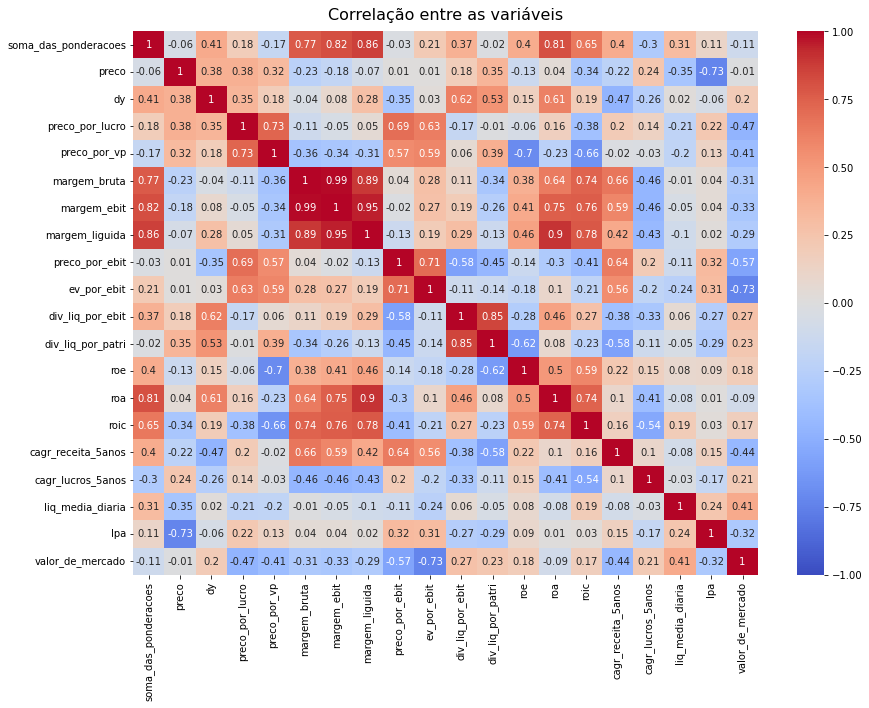

In [33]:
plt.figure(figsize=(14,10))
corr_var = sns.heatmap(dados_ranqueados_ordem.corr().round(2),
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      cmap='coolwarm')
corr_var.set_title('Correlação entre as variáveis', fontsize=16, y= 1.01)

### Analisando a correlação entre os critérios e a soma das ponderações

Text(0.5, 1.01, 'Critérios correlacionados com a Soma das ponderações')

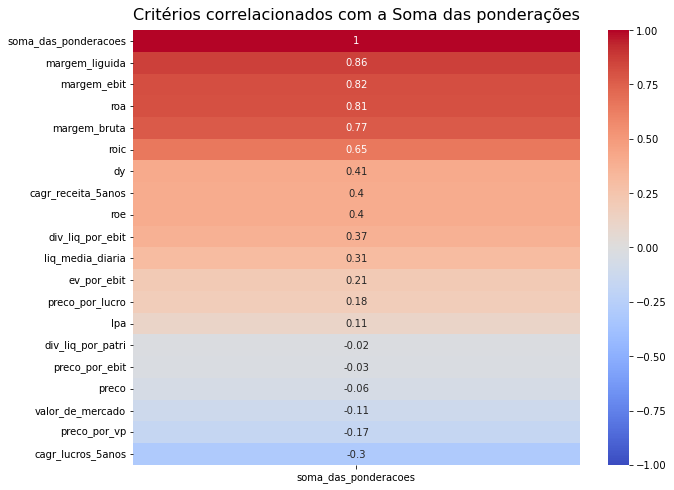

In [34]:
plt.figure(figsize=(10,8))
corr_var_soma_pond = sns.heatmap(dados_ranqueados_ordem.corr()[['soma_das_ponderacoes']].sort_values(by='soma_das_ponderacoes',
                                                                                                     ascending=False).round(2),
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      cmap='coolwarm')
corr_var_soma_pond.set_title('Critérios correlacionados com a Soma das ponderações', fontsize=16, y= 1.01)